# Lendo do Banco de dados

- Lucas Mafra - 12/0126443
- Luíza Aguiar Hansen - 140026711


In [1]:
from __future__ import print_function
from datetime import date, datetime, timedelta
import mysql.connector

In [2]:
cnx = mysql.connector.connect(user='root', database='estudos_em')
cursor = cnx.cursor()

In [3]:
sql = "SELECT * FROM alunos WHERE sexo = 2 AND`forma_saida_opcao`!= 1 "
cursor.execute(sql)
results = cursor.fetchall()
print(results[1])

(100068, '2', '1986-06-15 00:00:00.000', '128', '1', '1', '32', 1, 1, '20032', '20032', '4096', '20081', '1024', '240', '232')


In [4]:
cnx.close()

In [5]:
import pandas as pd
from collections import OrderedDict
from datetime import date

In [6]:
import numpy as np
import numpy.linalg as la
import csv
import sqlite3

In [7]:
lista = []
for y in range(0, len(results)):
    lista.append([])
    for x in range(len(results[y])):
        lista[y].append(0)
        lista[y][x] = results[y][x]

In [8]:
matrix_general = lista[0:5000]
print(matrix_general[5])


[101528, '2', '1985-02-24 00:00:00.000', '128', '1', '1', '32', 2, 2, '20041', '20041', '128', '20092', '1024', '180', '178']


# Curva de Andrews - Mulheres 
Análise das formas de saída do curso

In [9]:
print(matrix_general[0])

for y in range(0, len(matrix_general)):
    del(matrix_general[y][3]) #deletando UF
    del(matrix_general[y][2]) #deletando Data Nascimento
    del(matrix_general[y][1]) #deletando Sexo
    del(matrix_general[y][0]) #deletando ID
    
    for x in range(0, len(matrix_general[y])):
        if(matrix_general[y][x] != ''):
            matrix_general[y][x] = int(matrix_general[y][x])
        else:
            matrix_general[y][x] = 0
        if(x == 9): 
            if(matrix_general[y][9] != 1 and matrix_general[y][9] != 1024): # 1 = Ativo, 1024 = Formatura
                matrix_general[y][9] = 2 # Pessoas Desligadas
            if(matrix_general[y][9] == 1024):
                matrix_general[y][9] = 3  # Pessoas Formadas
    

print(matrix_general[0])
print(len(matrix_general))
print(len(lista))
print(lista[0])


[100066, '2', '1985-03-29 00:00:00.000', '128', '1', '1', '64', 64, 8, '20032', '20032', '4096', '20081', '1024', '274', '282']
[1, 1, 64, 64, 8, 20032, 20032, 4096, 20081, 3, 274, 282]
5000
5036
[1, 1, 64, 64, 8, 20032, 20032, 4096, 20081, 3, 274, 282]


In [10]:
import pandas as pd
import seaborn as sns
from pandas.tools.plotting import andrews_curves
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

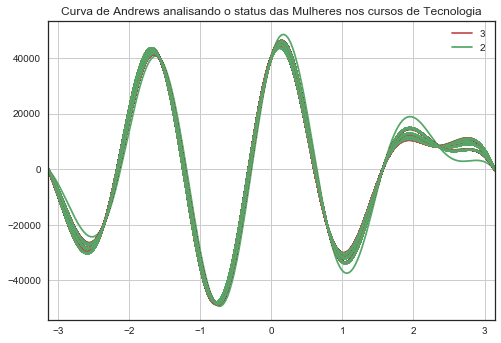

In [11]:
sns.set(style="white", color_codes=True)


bxg = pd.DataFrame(matrix_general)
# the iris dataset is now a Pandas DataFrame

# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do

#print(bxg.head())

# Let's see how many examples we have of each species

andrews_curves(bxg, 9, color=['r','g','b'])


plt.title("Curva de Andrews analisando o status das Mulheres nos cursos de Tecnologia")
plt.legend(loc = 'best')
plt.show()

# Coordenadas paralelas

      0   1    2   3   4      5      6     7      8   9    10   11
0      1   1   64  64   8  20032  20032  4096  20081   3  274  282
1      1   1   32   1   1  20032  20032  4096  20081   3  240  232
2      1   1   32   1   1  20032  20032    16  20042   2  240    6
3      1   1    1   2   2  20041  20041   128  20091   2  180  110
4      1   1   32   2   2  20041  20041   128  20061   2  180   42
5      1   1   32   2   2  20041  20041   128  20092   3  180  178
6      1   1   32  64   8  20041  20041   128  20082   3  274  255
7      1   1   32  64   8  20041  20041   128  20092   3  274  249
8      1   1   32  16  16  20041  20041   128  20092   2  244  156
9      1   1   32   1   1  20041  20041   128  20081   3  240  226
10     1   1   32  16  16  20041  20041   128  20081   3  244  222
11     1   1   32  16  16  20041  20041   128  20081   3  244  240
12     1   1  128   1   1  20041  20041   128  20061   2  240   80
13     1   1    2   1   1  20041  20041   128  20102   2  240 

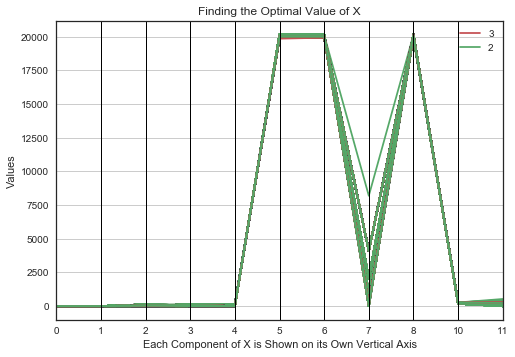

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates

data = pd.DataFrame(matrix_general)
#data = pandas.read_csv(r'C:\Python27\Lib\site-packages\pandas\tests\data\iris.csv', sep=',')
data2 = data[[0,1,2,3,4,5,6,7,8,9,10,11]]
print(data2)
parallel_coordinates(data2, 9,color=['r','g','b'])
plt.xlabel("Each Component of X is Shown on its Own Vertical Axis")
plt.ylabel("Values")
plt.title("Finding the Optimal Value of X")
plt.show()

# PCA

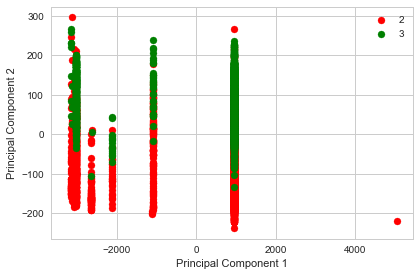

In [16]:
import pandas as pd
import seaborn as sns
from pandas.tools.plotting import radviz
# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA

sns.set(style="white", color_codes=True)

# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
iris = pd.DataFrame(matrix_general)
# iris = pd.read_csv("iris.csv") # the iris dataset is now a Pandas DataFrame

X_std = iris.ix[:,0:11].values
y = iris.ix[:,9].values
# Let's see how many examples we have of each species
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((2, 3),
                        ('red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


plt.show()

In [19]:
data = pd.DataFrame(matrix_general)
cov = data.cov()
cov

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.088092,0.102735,3.013260,-0.444351,-0.291480,5.106222,5.102389,3.527566e+01,4.263629,-0.017991,-0.076540,-4.524448
1,0.102735,1.045937,4.172083,-2.536802,-1.603133,39.423916,39.465566,-9.949412e+01,36.051207,-0.074542,-0.336168,-17.368697
2,3.013260,4.172083,594.797327,-11.096956,1.320006,98.364986,97.407966,1.161387e+03,69.494234,-0.645178,-22.615922,-184.937838
3,-0.444351,-2.536802,-11.096956,909.111800,460.297524,-221.523325,-227.750152,3.394822e+03,-205.696836,0.392121,291.571259,227.116489
4,-0.291480,-1.603133,1.320006,460.297524,489.916654,-188.885873,-191.760654,3.273341e+03,-216.779658,-0.557179,-127.102149,-154.119718
5,5.106222,39.423916,98.364986,-221.523325,-188.885873,3479.491304,3479.131530,-1.679210e+04,3038.147756,-8.360301,-131.612025,-1605.835089
6,5.102389,39.465566,97.407966,-227.750152,-191.760654,3479.131530,3499.938690,-1.686707e+04,3052.058012,-8.355040,-131.224008,-1573.377501
7,35.275660,-99.494125,1161.387028,3394.821526,3273.340826,-16792.099747,-16867.074608,2.706161e+06,-12889.994862,53.090234,-274.046182,18546.323289
8,4.263629,36.051207,69.494234,-205.696836,-216.779658,3038.147756,3052.058012,-1.288999e+04,3033.796028,-1.813582,-17.052107,-192.111111
9,-0.017991,-0.074542,-0.645178,0.392121,-0.557179,-8.360301,-8.355040,5.309023e+01,-1.813582,0.243965,2.715387,38.320026


In [20]:
corr = data.corr()
corr

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.338453,0.416279,-0.049653,-0.044369,0.291658,0.290587,0.072249,0.260806,-0.122721,-0.008089,-0.157019
1,0.338453,1.000000,0.167269,-0.082267,-0.070820,0.653505,0.652282,-0.059138,0.639991,-0.147565,-0.010311,-0.174932
2,0.416279,0.167269,1.000000,-0.015091,0.002445,0.068375,0.067512,0.028948,0.051733,-0.053559,-0.029088,-0.078108
3,-0.049653,-0.082267,-0.015091,1.000000,0.689714,-0.124553,-0.127679,0.068443,-0.123858,0.026330,0.303329,0.077588
4,-0.044369,-0.070820,0.002445,0.689714,1.000000,-0.144671,-0.146443,0.089899,-0.177813,-0.050965,-0.180123,-0.071722
5,0.291658,0.653505,0.068375,-0.124553,-0.144671,1.000000,0.996972,-0.173049,0.935099,-0.286946,-0.069987,-0.280412
6,0.290587,0.652282,0.067512,-0.127679,-0.146443,0.996972,1.000000,-0.173314,0.936633,-0.285927,-0.069576,-0.273941
7,0.072249,-0.059138,0.028948,0.068443,0.089899,-0.173049,-0.173314,1.000000,-0.142260,0.065339,-0.005225,0.116127
8,0.260806,0.639991,0.051733,-0.123858,-0.177813,0.935099,0.936633,-0.142260,1.000000,-0.066662,-0.009711,-0.035926
9,-0.122721,-0.147565,-0.053559,0.026330,-0.050965,-0.286946,-0.285927,0.065339,-0.066662,1.000000,0.172443,0.799128


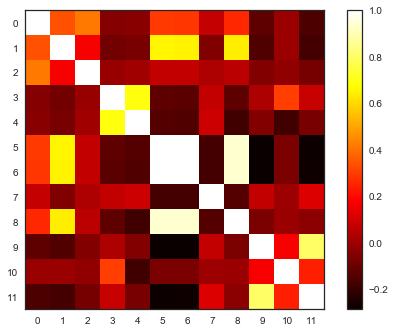

In [21]:
plt.imshow(corr, cmap='hot', interpolation='none')  
plt.colorbar()  
plt.xticks(range(len(corr)), corr.columns)  
plt.yticks(range(len(corr)), corr.columns);  
# plt.savefig("correl.png")  
plt.show()  